In [1]:
import sqlite3
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 0)

### First, try sqlite, read Superstore.csv, transfer it to a database table, and print the first three rows.

In [2]:
# Connect to SQLite database
conn = sqlite3.connect(r'test.db')

data = pd.read_csv('Superstore.csv')
data.to_sql('invoice', conn, if_exists='replace', index=False)

cursor = conn.cursor()
sql = 'SELECT * FROM invoice'
cursor.execute(sql)
print(cursor.fetchmany(3))

conn.close()

[(1, 'CA-2013-152156', '11/9/2013', '11/12/2013', 'Second Class', 'CG-12520', 'Claire Gute', 'Consumer', 'United States', 'Henderson', 'Kentucky', 42420, 'South', 'FUR-BO-10001798', 'Furniture', 'Bookcases', 'Bush Somerset Collection Bookcase', 261.96, 2, 0.0, 41.9136), (2, 'CA-2013-152156', '11/9/2013', '11/12/2013', 'Second Class', 'CG-12520', 'Claire Gute', 'Consumer', 'United States', 'Henderson', 'Kentucky', 42420, 'South', 'FUR-CH-10000454', 'Furniture', 'Chairs', 'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back', 731.94, 3, 0.0, 219.582), (3, 'CA-2013-138688', '6/13/2013', '6/17/2013', 'Second Class', 'DV-13045', 'Darrin Van Huff', 'Corporate', 'United States', 'Los Angeles', 'California', 90036, 'West', 'OFF-LA-10000240', 'Office Supplies', 'Labels', 'Self-Adhesive Address Labels for Typewriters by Universal', 14.62, 2, 0.0, 6.8714)]


### To put the query output into a dataframe.

In [3]:
conn = sqlite3.connect(r'test.db')
sql = 'SELECT * FROM invoice'
df = pd.read_sql_query(sql, conn)
conn.close()
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,11/9/2013,11/12/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,11/9/2013,11/12/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,6/13/2013,6/17/2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
3,4,US-2012-108966,10/11/2012,10/18/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,10/11/2012,10/18/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2011-110422,1/22/2011,1/24/2011,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2014-121258,2/27/2014,3/4/2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Carpets,91.960,2,0.0,15.6332
9991,9992,CA-2014-121258,2/27/2014,3/4/2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2014-121258,2/27/2014,3/4/2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2014-119914,5/5/2014,5/10/2014,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtout Fax/Phone Line Protection",243.160,2,0.0,72.9480


### Now, let's try to break Superstore data into eneities and draw an ER Diagram.

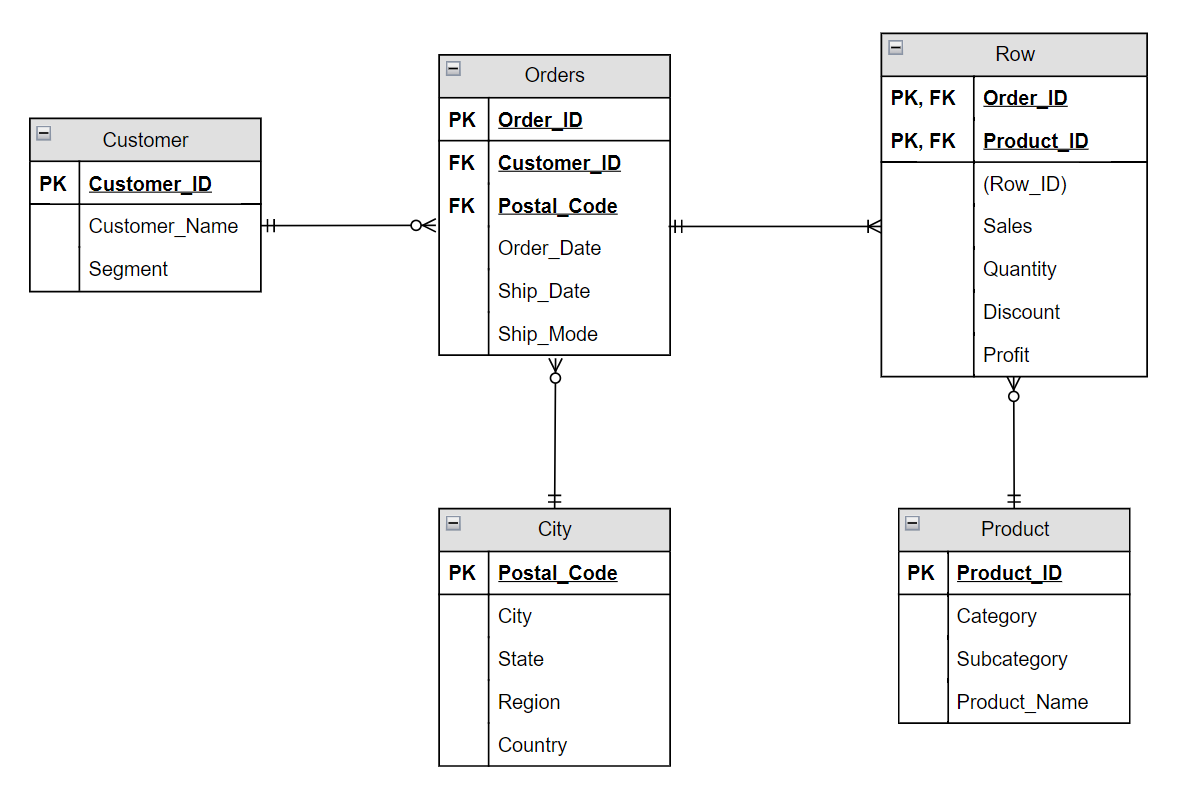




In [5]:
conn = sqlite3.connect(r'superstore_bug.db')

table1 = pd.read_csv('Customer.csv')
table1.to_sql('Customer', conn, if_exists='replace', index=False)
table2 = pd.read_csv('Orders.csv')
table2.to_sql('Orders', conn, if_exists='replace', index=False)
table3 = pd.read_csv('Product_x.csv')
table3.to_sql('Product', conn, if_exists='replace', index=False)
table4 = pd.read_csv('City_x.csv')
table4.to_sql('City', conn, if_exists='replace', index=False)
table5 = pd.read_csv('Row.csv')
table5.to_sql('Row', conn, if_exists='replace', index=False)

conn.close()

SELECT row.Row_ID, ord.Order_ID, ord.Order_Date, ord.Ship_Date, ord.ship_Mode, cus.Customer_ID, cus.Customer_Name, cus.Segment, 
city.Country, city.City, city.State, city.Postal_Code, city.Region, prod.Product_ID, prod.Category, prod.Subcategory, prod.Product_Name, row.Sales, row.Quantity, row.Discount, row.Profit <br>
FROM Row as row <br>
JOIN Orders as ord ON ord.Order_ID = row.Order_ID <br>
JOIN Customer as cus ON cus.Customer_ID = ord.Customer_ID <br>
JOIN City as city ON city.Postal_Code = ord.Postal_Code <br>
JOIN Product as prod ON prod.Product_ID = row.Product_ID

In [6]:
conn = sqlite3.connect(r'superstore_bug.db')
# sql = 'SELECT row.Row_ID, ord.Order_ID, ord.Order_Date, ord.Ship_Date, ord.ship_Mode FROM Row as row JOIN Orders as ord ON row.Order_ID = ord.Order_ID'

sql = 'SELECT row.Row_ID, ord.Order_ID, ord.Order_Date, ord.Ship_Date, ord.ship_Mode, cus.Customer_ID, cus.Customer_Name, cus.Segment, city.Country, city.City, city.State, city.Postal_Code, city.Region, prod.Product_ID, prod.Category, prod.Subcategory, prod.Product_Name, row.Sales, row.Quantity, row.Discount, row.Profit FROM Row as row JOIN Orders as ord ON ord.Order_ID = row.Order_ID JOIN Customer as cus ON cus.Customer_ID = ord.Customer_ID JOIN City as city ON city.Postal_Code = ord.Postal_Code JOIN Product as prod ON prod.Product_ID = row.Product_ID'


df = pd.read_sql_query(sql, conn)
conn.close()
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Subcategory,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,11/9/2013,11/12/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,11/9/2013,11/12/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,6/13/2013,6/17/2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
3,4,US-2012-108966,10/11/2012,10/18/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,10/11/2012,10/18/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [17]:
len(df)

10372

In [7]:
df.tail()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Subcategory,Product_Name,Sales,Quantity,Discount,Profit
10367,9990,CA-2011-110422,1/22/2011,1/24/2011,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
10368,9991,CA-2014-121258,2/27/2014,3/4/2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Carpets,91.960,2,0.0,15.6332
10369,9992,CA-2014-121258,2/27/2014,3/4/2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
10370,9993,CA-2014-121258,2/27/2014,3/4/2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
10371,9994,CA-2014-119914,5/5/2014,5/10/2014,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtout Fax/Phone Line Protection",243.160,2,0.0,72.9480


In [8]:
#output to csv file to find the problem
df.to_csv("test.csv", encoding = "utf_8_sig")

In [9]:
conn = sqlite3.connect(r'superstore_bug2.db')

table1 = pd.read_csv('Customer.csv')
table1.to_sql('Customer', conn, if_exists='replace', index=False)
table2 = pd.read_csv('Orders.csv')
table2.to_sql('Orders', conn, if_exists='replace', index=False)
table3 = pd.read_csv('Product.csv')
table3.to_sql('Product', conn, if_exists='replace', index=False)
table4 = pd.read_csv('City_x.csv')
table4.to_sql('City', conn, if_exists='replace', index=False)
table5 = pd.read_csv('Row.csv')
table5.to_sql('Row', conn, if_exists='replace', index=False)

conn.close()

In [10]:
conn = sqlite3.connect(r'superstore_bug2.db')
# sql = 'SELECT row.Row_ID, ord.Order_ID, ord.Order_Date, ord.Ship_Date, ord.ship_Mode FROM Row as row JOIN Orders as ord ON row.Order_ID = ord.Order_ID'

sql = 'SELECT row.Row_ID, ord.Order_ID, ord.Order_Date, ord.Ship_Date, ord.ship_Mode, cus.Customer_ID, cus.Customer_Name, cus.Segment, city.Country, city.City, city.State, city.Postal_Code, city.Region, prod.Product_ID, prod.Category, prod.Subcategory, prod.Product_Name, row.Sales, row.Quantity, row.Discount, row.Profit FROM Row as row JOIN Orders as ord ON ord.Order_ID = row.Order_ID JOIN Customer as cus ON cus.Customer_ID = ord.Customer_ID JOIN City as city ON city.Postal_Code = ord.Postal_Code JOIN Product as prod ON prod.Product_ID = row.Product_ID'


df2 = pd.read_sql_query(sql, conn)
conn.close()
df2.tail()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Subcategory,Product_Name,Sales,Quantity,Discount,Profit
10028,9990,CA-2011-110422,1/22/2011,1/24/2011,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
10029,9991,CA-2014-121258,2/27/2014,3/4/2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Carpets,91.960,2,0.0,15.6332
10030,9992,CA-2014-121258,2/27/2014,3/4/2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
10031,9993,CA-2014-121258,2/27/2014,3/4/2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
10032,9994,CA-2014-119914,5/5/2014,5/10/2014,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtout Fax/Phone Line Protection",243.160,2,0.0,72.9480


In [11]:
df2.to_csv("test2.csv", encoding = "utf_8_sig")

In [15]:
conn = sqlite3.connect(r'superstore.db')

table1 = pd.read_csv('Customer.csv')
table1.to_sql('Customer', conn, if_exists='replace', index=False)
table2 = pd.read_csv('Orders.csv')
table2.to_sql('Orders', conn, if_exists='replace', index=False)
table3 = pd.read_csv('Product.csv')
table3.to_sql('Product', conn, if_exists='replace', index=False)
table4 = pd.read_csv('City.csv')
table4.to_sql('City', conn, if_exists='replace', index=False)
table5 = pd.read_csv('Row.csv')
table5.to_sql('Row', conn, if_exists='replace', index=False)

conn.close()

In [16]:
conn = sqlite3.connect(r'superstore.db')
# sql = 'SELECT row.Row_ID, ord.Order_ID, ord.Order_Date, ord.Ship_Date, ord.ship_Mode FROM Row as row JOIN Orders as ord ON row.Order_ID = ord.Order_ID'

sql = 'SELECT row.Row_ID, ord.Order_ID, ord.Order_Date, ord.Ship_Date, ord.ship_Mode, cus.Customer_ID, cus.Customer_Name, cus.Segment, city.Country, city.City, city.State, city.Postal_Code, city.Region, prod.Product_ID, prod.Category, prod.Subcategory, prod.Product_Name, row.Sales, row.Quantity, row.Discount, row.Profit FROM Row as row JOIN Orders as ord ON ord.Order_ID = row.Order_ID JOIN Customer as cus ON cus.Customer_ID = ord.Customer_ID JOIN City as city ON city.Postal_Code = ord.Postal_Code JOIN Product as prod ON prod.Product_ID = row.Product_ID'


df3 = pd.read_sql_query(sql, conn)
conn.close()
df3.tail()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Subcategory,Product_Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2011-110422,1/22/2011,1/24/2011,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2014-121258,2/27/2014,3/4/2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Carpets,91.960,2,0.0,15.6332
9991,9992,CA-2014-121258,2/27/2014,3/4/2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2014-121258,2/27/2014,3/4/2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2014-119914,5/5/2014,5/10/2014,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtout Fax/Phone Line Protection",243.160,2,0.0,72.9480
